In [1]:
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import time

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
def batch_selector(x,y,batch_size,mode="random"):
    if(mode=="random"):
        indices=np.random.choice(len(x),batch_size)
        return(x[indices],y[indices],indices)
    

In [5]:
def plotit(y,labelx,labely,title):
    plt.plot(y)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.suptitle(title)
    plt.show()

In [6]:
class NN:
    def __init__ (self,I,H,O):
        self.I=I
        self.H=H
        self.O=O

        self.W1 = tf.Variable(tf.random_normal([H[-1], O]))
        self.b1 = tf.Variable(tf.ones([O]))
        self.x_ = tf.placeholder(tf.float32, [None, I])
        self.x=[self.x_]
        self.W = [tf.Variable(tf.random_normal([I, H[0]]))]+[tf.Variable(tf.random_normal([H[HH], H[HH+1]])) for HH in range(len(H)-1)]
        self.b = [tf.Variable(tf.ones([HH])) for HH in H]
        for ii in range(len(H)):
            self.x=self.x+[tf.nn.sigmoid(tf.matmul(self.x[-1], self.W[ii]) + self.b[ii])]

        self.y = tf.nn.softmax(tf.matmul(self.x[-1], self.W1) + self.b1)
        self.y_ = tf.placeholder(tf.float32, [None, O])
        self.cross_entropy1 = (-tf.reduce_sum(self.y_ * tf.log(self.y), reduction_indices=[1]))
        self.cross_entropy=tf.reduce_mean(self.cross_entropy1)
        
        self.optimizer=tf.train.GradientDescentOptimizer(1.0)

        self.var_list=[self.W1,self.b1]+ self.W + self.b
        self.grads1 = tf.gradients(self.cross_entropy,self.var_list)
        self.grads=[grad if grad is not None else tf.zeros_like(var) for var, grad in zip(self.var_list, self.grads1)]

        self.correct_prediction = tf.equal(tf.argmax(self.y,1), tf.argmax(self.y_,1))
        self.accuracy = tf.reduce_mean(tf.cast(self.correct_prediction, tf.float32))
    def updategrads(self,grads,lr):
        grads_and_vars=[(grads[iii]*lr,self.var_list[iii]) for iii in range(len(grads))]
        hh=self.optimizer.apply_gradients(grads_and_vars)
        sess.run(hh) 

In [7]:
ff=NN(784,[32,32],10)

In [8]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
batch_size=100;accumulator1=[]

In [9]:
t=time.time()
lr=0.7
inc=1.1
for _ in range(100):
    batch_xs, batch_ys,indices = batch_selector(mnist.train.images,mnist.train.labels,batch_size,'random')
    #sess.run(ff.optimizer.minimize(ff.cross_entropy), feed_dict={ff.x_: batch_xs, ff.y_: batch_ys})
    wwq=sess.run(ff.grads, feed_dict={ff.x_: batch_xs, ff.y_: batch_ys})
    
    ff.updategrads(wwq,lr/inc)
    loss1=sess.run(ff.cross_entropy, feed_dict={ff.x_: batch_xs, ff.y_: batch_ys})
    
    ff.updategrads(wwq,(lr*(1-1/inc)))
    loss2=sess.run(ff.cross_entropy, feed_dict={ff.x_: batch_xs, ff.y_: batch_ys})  
    
    ff.updategrads(wwq,lr*(inc-1))
    loss3=sess.run(ff.cross_entropy, feed_dict={ff.x_: batch_xs, ff.y_: batch_ys})
    min_index=np.argmin([loss1,loss2,loss3])
    if(min_index==1):
        ff.updategrads(wwq,lr*(1-inc))
    elif(min_index==0):
        ff.updategrads(wwq,lr*(1/inc-inc))
        lr=lr/inc
    else:
        lr=lr*inc
    print(lr)
    
    #print(sess.run(ff.b[0]))
    if _%10==0:
        accumulator1=accumulator1+[sess.run(ff.cross_entropy, feed_dict={ff.x_: mnist.train.images, ff.y_: mnist.train.labels})]
print("Time spent in training : ",time.time()-t," seconds")
print("Current accuracy : ",sess.run(ff.accuracy, feed_dict={ff.x_: mnist.test.images, ff.y_: mnist.test.labels}))

0.7
0.6363636363636362
0.7
0.77
0.7
0.6363636363636362
0.5785123966942147
0.6363636363636362
0.7
0.7
0.6363636363636362
0.5785123966942147
0.6363636363636362
0.7
0.6363636363636362
0.5785123966942147
0.6363636363636362
0.6363636363636362
0.7
0.77
0.7
0.6363636363636362
0.5785123966942147
0.6363636363636362
0.7
0.7
0.6363636363636362
0.7
0.77
0.8470000000000001
0.77
0.7
0.6363636363636362
0.5785123966942147
0.6363636363636362
0.7
0.7
0.6363636363636362
0.7
0.7
0.77
0.8470000000000001
0.77
0.7
0.6363636363636362
0.7
0.77
0.8470000000000001
0.77
0.77
0.8470000000000001
0.77
0.7
0.77
0.8470000000000001
0.77
0.77
0.77
0.7
0.77
0.7
0.77
0.77
0.77
0.8470000000000001
0.77
0.7
0.6363636363636362
0.7
0.77
0.7
0.77
0.8470000000000001
0.77
0.77
0.8470000000000001
0.9317000000000002
0.8470000000000001
0.8470000000000001
0.77
0.8470000000000001
0.77
0.7
0.6363636363636362
0.7
0.7
0.77
0.8470000000000001
0.77
0.77
0.77
0.7
0.77
0.8470000000000001
0.77
0.77
0.77
0.8470000000000001
0.8470000000000001
0

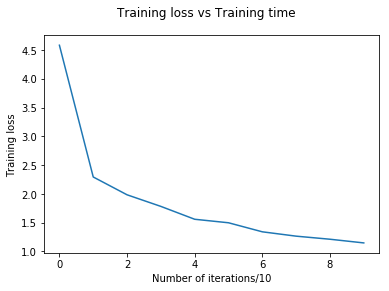

In [10]:
plotit(accumulator1,"Number of iterations/10","Training loss","Training loss vs Training time")

In [11]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
batch_size=100;accumulator2=[]

In [12]:
import time
t=time.time()
lr=0.7

for _ in range(100):
    batch_xs, batch_ys,indices = batch_selector(mnist.train.images,mnist.train.labels,batch_size,'random')
    
    wwq=sess.run(ff.grads, feed_dict={ff.x_: batch_xs, ff.y_: batch_ys})
    ff.updategrads(wwq,lr)
    
    if _%10==0:
        accumulator2=accumulator2+[sess.run(ff.cross_entropy, feed_dict={ff.x_: mnist.train.images, ff.y_: mnist.train.labels})]
print("Time spent in training : ",time.time()-t," seconds")

print("Current accuracy : ",sess.run(ff.accuracy, feed_dict={ff.x_: mnist.test.images, ff.y_: mnist.test.labels}))

Time spent in training :  18.04066300392151  seconds
Current accuracy :  0.5909


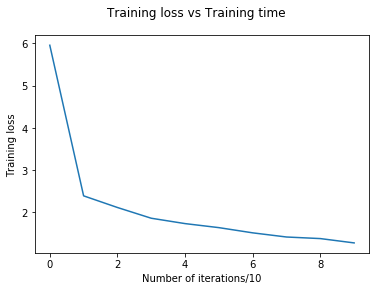

In [13]:
plotit(accumulator2,"Number of iterations/10","Training loss","Training loss vs Training time")